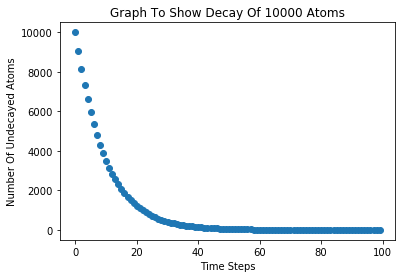

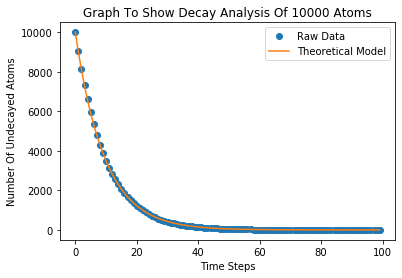

-------------------------------------------------
Decay constant = 0.10512915248972099
Decay half-life = 6.593291814349191
-------------------------------------------------


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import random


###########################################################
# VIRTUAL RADIOACTIVITY EXPERIMENT
###########################################################

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Section 1 - Experiment Set Up

totalNumberOfAtoms = 10000
probabilityLevel = 1/10
trayArray = np.ones(totalNumberOfAtoms)


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Section 2 - Data Recording Set Up

numberOfTrayShakes = 100

timeStepArray = np.zeros(numberOfTrayShakes)
numberOfActiveAtomsArray = np.zeros(numberOfTrayShakes)


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Section 3 - Running The Experiment

for i in range(numberOfTrayShakes):

    timeStepArray[i] = i 

    numberOfActiveAtoms = np.sum(trayArray)
    numberOfActiveAtomsArray[i] = numberOfActiveAtoms


    for j in range(totalNumberOfAtoms):
        randomlyGeneratedNumber = random.uniform(0, 1)

        if(randomlyGeneratedNumber < probabilityLevel):
            trayArray[j] = 0


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Section 4 - Presenting The Raw Data

plt.figure()
plt.title('Graph To Show Decay Of ' + str(totalNumberOfAtoms) + ' Atoms')
plt.xlabel('Time Steps')
plt.ylabel('Number Of Undecayed Atoms')

plt.plot(timeStepArray, numberOfActiveAtomsArray, 'o')
plt.show()


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Section 5 - Creating A Model
#
# Note: The below function is created from the equation of
#       radioactive decay.

def TheoreticalDecay(timeArray, totalNumberOfAtoms, decayConstant):

    expectedNumberOfActiveAtomsArray = totalNumberOfAtoms * np.exp(-decayConstant * timeArray)

    return expectedNumberOfActiveAtomsArray


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Section 5 - Fitting The Model To Raw Data

plt.figure()
plt.title('Graph To Show Decay Analysis Of ' + str(totalNumberOfAtoms) + ' Atoms')
plt.xlabel('Time Steps')
plt.ylabel('Number Of Undecayed Atoms')

timeArray = np.linspace(timeStepArray[0], timeStepArray[-1], 5000)

popt, pcov = curve_fit(
                    TheoreticalDecay,
                    timeStepArray, numberOfActiveAtomsArray,
                    (totalNumberOfAtoms, 0.5))

plt.plot(timeStepArray, numberOfActiveAtomsArray, 'o', label = 'Raw Data')
plt.plot(timeArray, TheoreticalDecay(timeArray, totalNumberOfAtoms, popt[1]), label = 'Theoretical Model')

plt.legend(loc = 'best')
plt.show()


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Section 6 - Extracting Key Information

print ('-------------------------------------------------')
print ('Decay constant = ' + str(popt[1]))

decayHalfLife = np.log(2) / popt[1]

print ('Decay half-life = ' + str(decayHalfLife))
print ('-------------------------------------------------')


